<a href="https://colab.research.google.com/github/Trinanjan001/BSC-Project/blob/master/PCA_Trinanjan_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

Loading the dataset

In [ ]:
dataset = load_iris()

Extracting the Features and Target variable

In [ ]:
iris_data= dataset.data
iris_target = dataset.target
iris_target.shape

(150,)

Reshaping the target variable and concatenating it with Feature

In [ ]:
#labels = np.reshape(y,(569,1))
labels = np.reshape(iris_target,(150,1))
final_dataset_np = np.concatenate([iris_data,labels],axis=1)

final_df = pd.DataFrame(data = final_dataset_np)
final_df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Extracting the feature names and assigning to the Dataframe

In [ ]:
features = dataset.feature_names

#features

feature_labels = np.append(features,"label")

final_df.columns = feature_labels
final_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Assigning the names to the categorical value of the Target variable

In [ ]:
final_df['label'].replace(0,"iris-setosa",inplace=True)
final_df['label'].replace(1,"iris-versicolor",inplace=True)
final_df['label'].replace(2,"iris-verginica",inplace=True)
final_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
145,6.7,3.0,5.2,2.3,iris-verginica
146,6.3,2.5,5.0,1.9,iris-verginica
147,6.5,3.0,5.2,2.0,iris-verginica
148,6.2,3.4,5.4,2.3,iris-verginica
149,5.9,3.0,5.1,1.8,iris-verginica


Scaling the Feature Variables

In [ ]:
from sklearn.preprocessing import StandardScaler
x = final_df.loc[:,features].values
x = StandardScaler().fit_transform(x)
x.shape

(150, 4)

Creating the dataframe with Scaling values of the feature variables

In [ ]:
feat_colm = ['features'+str(i) for i in range(x.shape[1])]

final_df1 = pd.DataFrame(x,columns=feat_colm)

final_df1.tail()

,features0,features1,features2,features3
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832
149,0.068662,-0.131979,0.762758,0.790671


Program 1: Implement PCA with two components using scikit-learn upon the Iris data set. Fit and transform the PCA model upon the entire data set and plot the transformed data using scatter plot.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principal_Df.tail()

,principal component 1,principal component 2
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254
149,0.960656,-0.024332


Explain the variation of the Dataset

In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.72962445 0.22850762]


<Figure size 640x480 with 0 Axes>

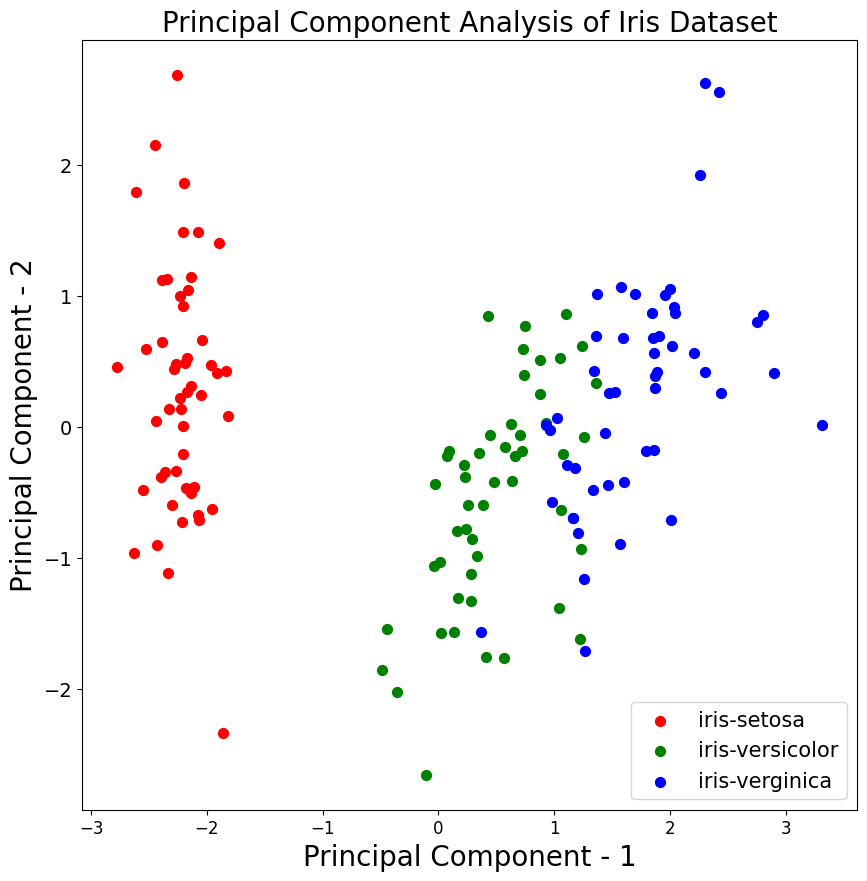

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Iris Dataset",fontsize=20)
targets = ["iris-setosa","iris-versicolor","iris-verginica"]
colors = ['r', 'g','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['label'] == target
    plt.scatter(principal_Df.loc[indicesToKeep, 'principal component 1']
               , principal_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

Program 2:
Implement PCA with two components using scikit-learn upon the Iris data set. Fit the PCA model upon the training set and transform the model on the test test. Plot the transformed test data using scatter plot.


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,iris_target,test_size=0.6,random_state=10)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents_train = pca.fit(X_train)
principalComponents_test = pca.transform(X_test)

principalDf = pd.DataFrame(data = principalComponents_test
             , columns = ['principal component 1', 'principal component 2'])

principalDf.tail()

,principal component 1,principal component 2
85,-2.048114,1.322824
86,-2.075103,0.976642
87,0.405711,-0.236803
88,2.535306,0.443452
89,1.587321,0.084768


Explain the Variance of the Dataset

In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.73097036 0.22497698]


Plotting the graph based on Test Data

<Figure size 640x480 with 0 Axes>

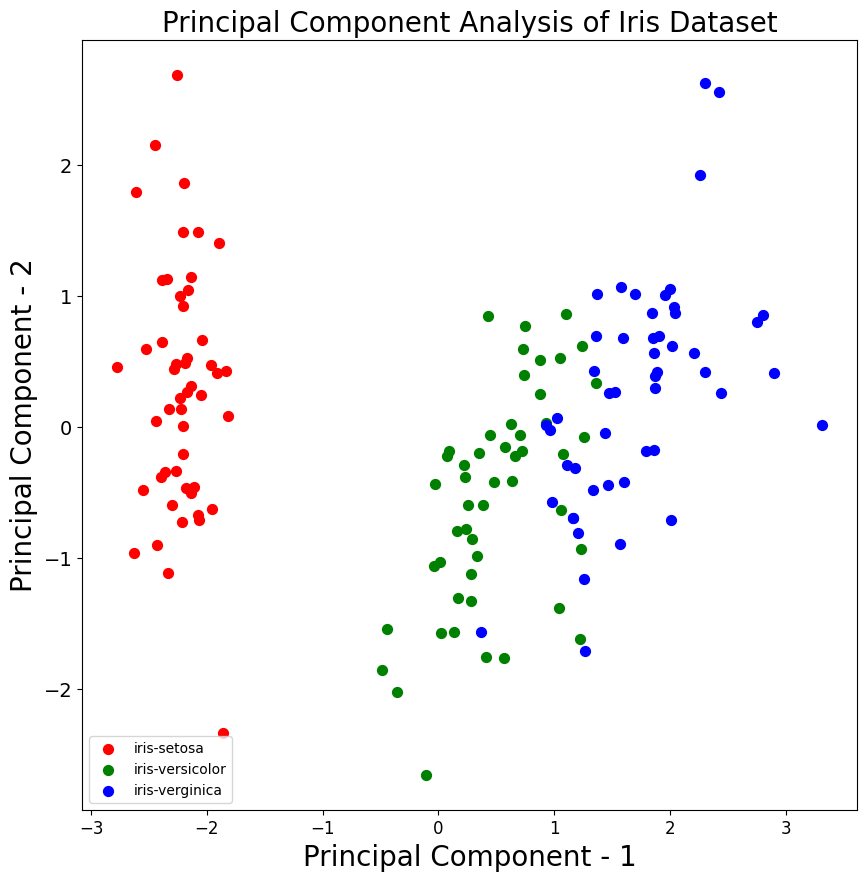

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Iris Dataset",fontsize=20)
targets = ["iris-setosa","iris-versicolor","iris-verginica"]
colors = ['r', 'g','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['label'] == target
    plt.scatter(principal_Df.loc[indicesToKeep, 'principal component 1']
               , principal_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets)

Program 3: Implement PCA using scikit-learn upon the Iris data set capturing 80% variance. Fit the PCA model upon the training set and transform the model on the test test. In case the no. of components is less than 2, increase the variance captured to accommodate two components. Plot the transformed test data using scatter plot.

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,iris_target,test_size=0.6,random_state=10)

from sklearn.decomposition import PCA
pca = PCA(n_components=0.80)
principalComponents_train = pca.fit(X_train)
principalComponents_test = pca.transform(X_test)

principalDf = pd.DataFrame(data = principalComponents_test
             , columns = ['principal component 1', 'principal component 2'])

principalDf.tail()

,principal component 1,principal component 2
85,-2.048114,1.322824
86,-2.075103,0.976642
87,0.405711,-0.236803
88,2.535306,0.443452
89,1.587321,0.084768


<Figure size 640x480 with 0 Axes>

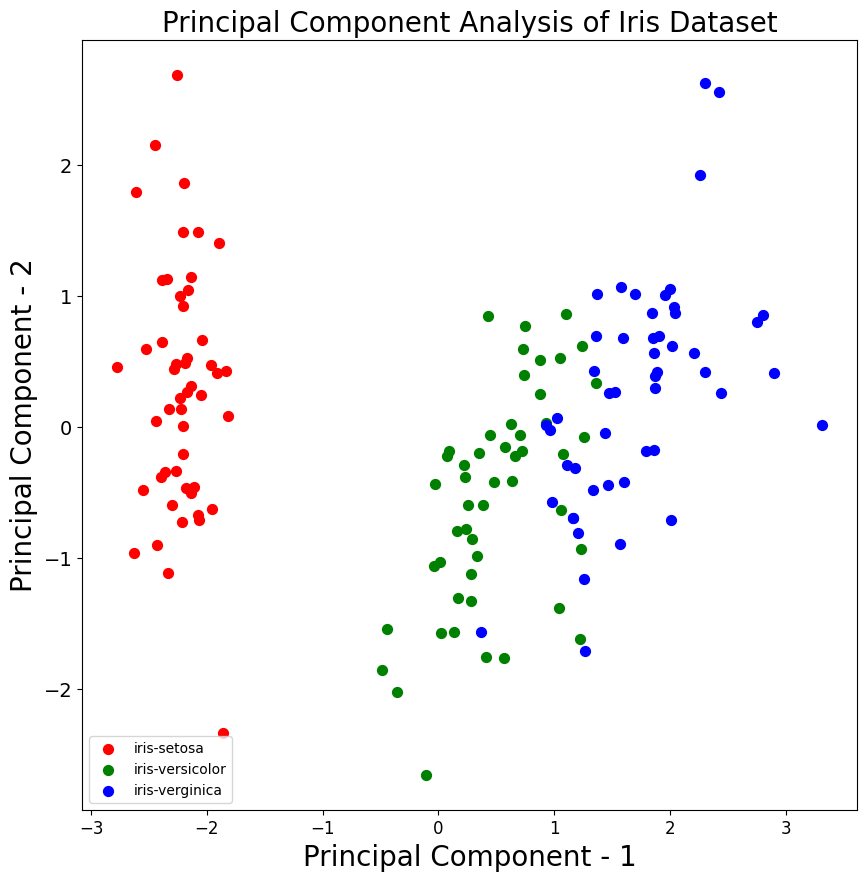

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Iris Dataset",fontsize=20)
targets = ["iris-setosa","iris-versicolor","iris-verginica"]
colors = ['r', 'g','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['label'] == target
    plt.scatter(principal_Df.loc[indicesToKeep, 'principal component 1']
               , principal_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets)